# Machine learning - Project - 1
author: Ben Delcoigne

## Feature selection

We will start by importing our data and taking a first look at it: 


In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.feature_selection import SelectFromModel
import sklearn.feature_selection as fsl

X1 = pd.read_csv('X1.csv')
Y1 = pd.read_csv('Y1.csv', header = None, names = ['shares'])

X1 = X1

In [2]:
X1.describe()
X1.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,10.0,379.0,0.521622,1.0,0.697248,5.0,2.0,1.0,0.0,4.126649,...,0.368452,0.1,0.5,-0.244444,-0.500000,-0.050000,0.227273,0.068182,0.272727,0.068182
1,12.0,402.0,0.502660,1.0,0.645299,12.0,10.0,1.0,0.0,4.537313,...,0.270170,0.1,0.5,-0.159259,-0.166667,-0.155556,0.500000,0.500000,0.000000,0.500000
2,11.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
3,9.0,256.0,0.619608,1.0,0.792208,2.0,0.0,0.0,1.0,4.644531,...,0.245130,0.1,1.0,-0.500000,-0.500000,-0.500000,0.200000,0.100000,0.300000,0.100000
4,12.0,268.0,0.591603,1.0,0.740260,1.0,1.0,1.0,1.0,4.671642,...,0.539076,0.2,1.0,-0.254167,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000


In [3]:
Y1.describe()

,shares
count,19822.00000
mean,3430.66850
std,11789.36858
min,1.00000
25%,949.00000
50%,1400.00000
75%,2800.00000
max,843300.00000


## Removing outliers?


In [4]:
z_scores = scipy.stats.zscore(Y1)
filtered = (np.abs(z_scores)<3).all(axis=1)
print(filtered)
true = 0
total = len(filtered)
for i in filtered: 
    if i:
        true+=1
print(true)
print(total)

X1 = X1[filtered]
Y1 = Y1[filtered]

Y1.describe()

[ True  True  True ...  True  True  True]
19663
19822


,shares
count,19663.000000
mean,2768.815135
std,3992.858725
min,1.000000
25%,945.000000
50%,1400.000000
75%,2700.000000
max,38700.000000


In [5]:
#We can take a look at the correlation of our data
n_samples, n_feats = X1.shape
corr_vec = np.corrcoef(X1,Y1, rowvar=False)[-1, :n_feats]
most_corr = np.argsort(np.abs(corr_vec))

print(corr_vec)

[-0.01401332  0.00089562 -0.0168439  -0.03166801 -0.03761101  0.07654033
  0.01279757  0.08147842  0.03658408 -0.03765049  0.0412085   0.02034043
 -0.04286412 -0.04348022  0.04980581  0.00685073 -0.09447022  0.0177207
  0.0393299   0.04080454  0.01428435 -0.00088439  0.05149109  0.08314915
  0.10967531  0.18572532  0.0517502   0.05289959  0.06217173 -0.00193513
 -0.02443006 -0.01579065 -0.02137719  0.00717887  0.03809475  0.05098491
  0.06557879  0.00019077 -0.02699137 -0.10585314  0.12431228 -0.00357237
  0.06175997  0.01545899  0.01199752  0.02008216 -0.02061558 -0.00915746
  0.03590221  0.01068577  0.02437531 -0.03777176 -0.02529485 -0.01497394
  0.04536092  0.03206055 -0.00296252  0.04774786]


We notice the linear correlation between the features is not good, which is to be expected

## Normalizing our data
In order for our models to work, we can normalize the data. This is to make sure some data are not overwhelming the effects of other data since some models apply the same weight to each feature. 

In [6]:
df = X1
normalized_df=(df-df.min())/(df.max()-df.min())
X1 = normalized_df

### Lasso feature importance

We have a look at the feature importance using lasso first: 

Lasso works well for linear approximations. We should get an idea of which features are important with this method but should not expect the best results. 



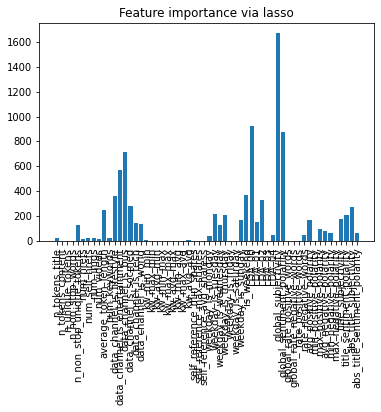

In [6]:
lasso = lm.Lasso().fit(X1,Y1)
importance = np.abs(lasso.coef_)
feature_names = np.arange(0,n_feats)
plt.bar(height=importance, x=feature_names)
plt.xticks(feature_names, X1.columns, rotation='vertical')
plt.title("Feature importance via lasso")
plt.show()

I notice a spike on this graph, lets see which feature it is.

In [7]:
print(X1.columns[np.argmax(importance)])

global_subjectivity


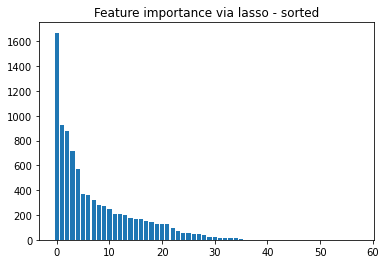

In [8]:
sorted_importance = np.sort(importance)[::-1]
plt.bar(height = sorted_importance, x=feature_names)
plt.title("Feature importance via lasso - sorted")
plt.show()


In [9]:
features_to_take = 20
threshold = np.sort(importance)[-features_to_take]# + 0.01
lasso = SelectFromModel(lasso, threshold=threshold).fit(X1, Y1)
print("Features selected by SelectFromModel: "
      f"{feature_names[lasso.get_support()]}")

print("Features selected by SelectFromModel: "
      f"{X1.columns[lasso.get_support()]}")

Features selected by SelectFromModel: [ 9 11 12 13 14 15 16 30 32 35 36 37 38 39 42 43 48 54 55 56]
Features selected by SelectFromModel: Index(['average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_tuesday', 'weekday_is_thursday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'global_subjectivity', 'global_sentiment_polarity',
       'avg_positive_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity'],
      dtype='object')


### Mutual information 

Feature selection can be performed with a criterion that quantifies the pertinence of features for predicting the target. We will investigate the two following criteria: the correlation coefficient (using `numpy.corrcoef`) and the mutual information (using `sklearn.feature_selection.mutual_info_regression`). A simple feature selection strategy consists in selecting the features achieving a sufficiently high score for a given criterion. 



In [7]:
#Finding the correlation 
#correlation = np.corrcoef(X1)

In [8]:
#Finding the mutual information
import time
start_time = time.time()
mutualinfo = fsl.mutual_info_regression(X1, Y1.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))

--- 23.54042887687683 seconds ---


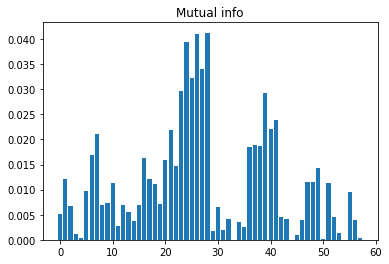

In [11]:
feature_names = np.arange(0,n_feats)


plt.bar(height=mutualinfo, x=feature_names)
plt.title("Mutual info")
plt.show()

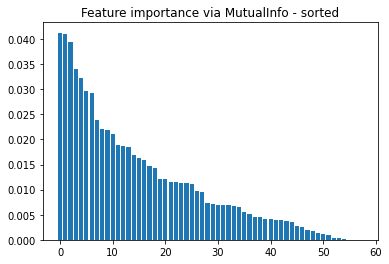

In [12]:
sorted_mutualinfo = np.sort(mutualinfo)[::-1]
plt.bar(height = sorted_mutualinfo, x=feature_names)
plt.title("Feature importance via MutualInfo - sorted")
plt.show()


In [13]:
features_to_take = 20
threshold = sorted_mutualinfo[features_to_take] 
print(threshold)
selected_mutinfo = np.argwhere(mutualinfo > threshold)
print(selected_mutinfo.T)
print(X1.columns[selected_mutinfo].shape)
print(X1.columns[selected_mutinfo])


0.012051363673633464
[[ 1  6  7 16 20 21 22 23 24 25 26 27 28 36 37 38 39 40 41 49]]
(20, 1)
[['n_tokens_content']
 ['num_self_hrefs']
 ['num_imgs']
 ['data_channel_is_world']
 ['kw_min_max']
 ['kw_max_max']
 ['kw_avg_max']
 ['kw_min_avg']
 ['kw_max_avg']
 ['kw_avg_avg']
 ['self_reference_min_shares']
 ['self_reference_max_shares']
 ['self_reference_avg_sharess']
 ['is_weekend']
 ['LDA_00']
 ['LDA_01']
 ['LDA_02']
 ['LDA_03']
 ['LDA_04']
 ['min_positive_polarity']]


<ipython-input-13-cf9a2327db03>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(X1.columns[selected_mutinfo].shape)
<ipython-input-13-cf9a2327db03>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(X1.columns[selected_mutinfo])


The most important feature in **lasso** is also in the most important features here. We have a good idea this feature is of great importance. 

## Defining a learning and a validation set
For this project, I will choose the following ponderation
 - 80% Learning set
 - 20% test set

In [14]:
from sklearn.model_selection import train_test_split

colnames = (X1.columns[selected_mutinfo]).reshape(-1)
#print(colnames)
X1_selected = X1[colnames]

print(X1_selected.columns)

X_train, X_test, y_train, y_test = train_test_split(X1_selected, Y1, test_size=0.2, random_state=1)

Index(['n_tokens_content', 'num_self_hrefs', 'num_imgs',
       'data_channel_is_world', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'min_positive_polarity'],
      dtype='object')


<ipython-input-14-4b2ae9224020>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  colnames = (X1.columns[selected_mutinfo]).reshape(-1)


Before we can start creating models, we must have a score function. It was defined in the statement: 


In [15]:
import sklearn
def score_f1(ytrue, ypred, th):
    return sklearn.metrics.f1_score(ytrue>th, ypred>th)
def score_regression(ytrue, ypred):
    scores = [score_f1(ytrue, ypred, th=th) for th in [500,1400,5000,10000]]
    return np.mean(scores)

score_regression(y_test, y_test)
#Should print 1 since we're testing a good input-output ratio

1.0

## Linear Regression

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
linearegr = lm.LinearRegression(n_jobs=-1)
linearegr.fit(X_train, y_train)

linear_ypred = linearegr.predict(X_test)
print(linearegr.score(X_test, y_test))
print(score_regression(linear_ypred, y_test))

0.04726285760201254
0.43950950801453015


## KNN Regressor
When training on k neighbors, we must choose how many neighbors we will choose. For that reason, I will apply the KMN algorithm on 10K values.

In [18]:
def kmnscore(i):
    kmnregr = sklearn.neighbors.KNeighborsRegressor(i,n_jobs=8)
    kmnregr.fit(X_train, y_train)
    
    ykmn = kmnregr.predict(X_test)
    ret = score_regression(ykmn, y_test)
    return ret

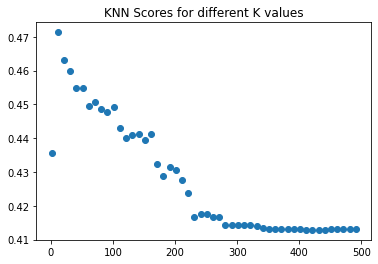

In [19]:
Kvalue = []
Kscore = []
for i in range(1,500,10):
    Kvalue.append(i)
    Kscore.append(kmnscore(i))

plt.scatter(Kvalue, Kscore)
plt.title('KNN Scores for different K values')
plt.show()

In [20]:
Kvalue[3]

31

**BEST RESULTS I GOT**
- Selected features: 5 - Mutual info - No normalization
- Kvalue: 31
- Best val: 0.507

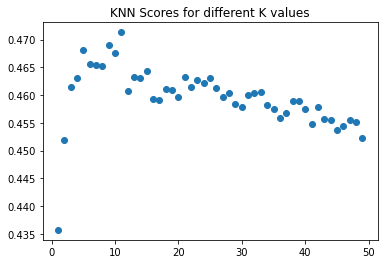

In [23]:
Kvalue = []
Kscore = []
for i in range(1,50,1):
    Kvalue.append(i)
    Kscore.append(kmnscore(i))

plt.scatter(Kvalue, Kscore)
plt.title('KNN Scores for different K values')

plt.show()

In [24]:
print(np.argmax(Kscore))
print(np.max(Kscore))


10
0.47133522211824946


# SKLEARN MLP
After numerous attempts on coding the MLP on Pytorch, i managed to get a working template (see pytorch), however its results were not promising. I then switched to TensorFlow which was a pain to install, but I managed to get it working on google collab. The results are not promising either. I thus result in using sklearn which is a billion times less painful to code with, the performances are just reduced because computations are done on the cpu and not the GPU. The results are the same anyway. The reason I stick with sklearn is because setting the parameters is a lot quicker and more user-friendly. 

In [17]:
print(y_train.values.ravel().shape)
print(X_train.values.shape)

print(type(X_train.values))

(15730,)
(15730, 20)
<class 'numpy.ndarray'>


In [25]:
from sklearn.model_selection import train_test_split    
from sklearn.neural_network import MLPRegressor


rgr = MLPRegressor(hidden_layer_sizes=(64,20 ), verbose=True, learning_rate = 'adaptive', learning_rate_init = 0.1)


for i in list(range(100)):
    rgr.partial_fit(X_train.values, y_train.values.reshape(-1))

y_predicted = rgr.predict(X_test)


Iteration 1, loss = 8019384.92311074
Iteration 2, loss = 7566303.64163518
Iteration 3, loss = 7534935.79576796
Iteration 4, loss = 7522966.86518681
Iteration 5, loss = 7502071.89225293
Iteration 6, loss = 7491526.87955401
Iteration 7, loss = 7491815.80245467
Iteration 8, loss = 7489803.25135457
Iteration 9, loss = 7504161.62398779
Iteration 10, loss = 7494110.28207166
Iteration 11, loss = 7446764.08876290
Iteration 12, loss = 7481718.58492746
Iteration 13, loss = 7460687.99452882
Iteration 14, loss = 7414245.24328714
Iteration 15, loss = 7417029.43395743
Iteration 16, loss = 7424295.24523903
Iteration 17, loss = 7413697.95264298
Iteration 18, loss = 7440014.74753400
Iteration 19, loss = 7393350.58000815
Iteration 20, loss = 7410706.42647787
Iteration 21, loss = 7411412.81439907
Iteration 22, loss = 7356355.90085522
Iteration 23, loss = 7339283.06532904
Iteration 24, loss = 7333785.90401946
Iteration 25, loss = 7314991.28287049
Iteration 26, loss = 7287273.53093270
Iteration 27, loss = 

In [27]:
print(score_regression(y_predicted, y_test))

0.4412487696246217


**Worse than Linear regression.**